# Traveling Wave Cavity

A traveling wave needs to be described by four fieldmaps:
entrance
two body 
exit



http://accelconf.web.cern.ch/accelconf/p79/PDF/PAC1979_3701.PDF

```
0.052464 0 0 105 1.42 25500000.0 2856000000.0 119.0 4 0.15 0.0 0.0 0.0 0.0 0.0 0.0 /!name:entrance
2.937928 0 0 105 1.472464 29430178.7820912 2856000000.0 149.0 5 0.15 0.0 0.0 0.0 0.0 0.0 0.0 /!name:body_1
2.937928 0 0 105 1.472464 29430178.7820912 2856000000.0 209.0 6 0.15 0.0 0.0 0.0 0.0 0.0 0.0 /!name:body_2
0.05246 0 0 105 4.410392 25500000.0 2856000000.0 119.0 7 0.15 0.0 0.0 0.0 0.0 0.0 0.0 /!name:exit
```


The following 4 lines define a 3-cell s-band traveling wave structure
using the supperposition of two standing wave strutures.
G. A. Loew et al., SLAC-PUB-2295, 1979.

- the phase of line 2 is the phase of line 1 + 30 degrees;
- the phase of line 3 is the phase of line 1 + 90 degrees.
- the phase of line 4 is the same as the line 1;
- the field scale of line 2 is the scale of the line 1/sin(beta d) 
- the field scale of line 3 is the scale of the line 1/sin(beta d) 
- the scale of line 4 is the same as the line 1;



In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
frf = 2856000000.0
c = 299792458.
pi = np.pi
k = 2*pi*frf/c
d = 3.5e-2 # periodic length
np.sin(k*d),  25905612.0/29913224.7 #= 0.86571945106805 #roughly equals 25905612.0/29913224.7 as above

(np.float64(0.86571945106805), 0.8660253870924187)

In [3]:
frf/c

9.526590558859223

In [4]:
from impact import Impact, fieldmaps

In [5]:
ifile = '../templates/traveling_wave_cavity/ImpactT.in'
os.path.exists(ifile)

True

In [6]:
I = Impact(ifile)

In [7]:
#I.run()

# Fieldmaps

In [8]:
I.input['fieldmaps']
fmap4 = I.input['fieldmaps']['rfdata4']['field']['Ez']
fmap5 = I.input['fieldmaps']['rfdata5']['field']['Ez']
fmap6 = I.input['fieldmaps']['rfdata6']['field']['Ez']
fmap7 = I.input['fieldmaps']['rfdata7']['field']['Ez']
# fmap4 = fieldmaps.process_fieldmap_solrf(rdfa['field']['Ez']ta4['data'])['Ez']
# fmap5 = fieldmaps.process_fieldmap_solrf(rdfata5['data'])['Ez']
# fmap6 = fieldmaps.process_fieldmap_solrf(rdfata6['data'])['Ez']
# fmap7 = fieldmaps.process_fieldmap_solrf(rdfata7['data'])['Ez']

In [9]:
fieldmaps.fieldmap_reconstruction_solrf(fmap4, 0)

np.float64(0.00029705336845264885)

In [10]:
fmap4

{'z0': np.float64(-0.052464),
 'z1': np.float64(0.052464),
 'L': np.float64(0.104928),
 'fourier_coefficients': array([ 6.70002854e-01, -4.88198923e-01,  1.13480302e-08,  1.84595508e-01,
        -7.71467877e-09, -2.13348183e-02,  6.02607452e-10, -1.74781481e-02,
         4.51769540e-09,  1.09000464e-02, -5.96395860e-10, -2.45640689e-03,
         5.31099067e-08, -8.37267976e-04,  7.96730829e-08,  6.58132017e-04,
         2.30345527e-08, -2.85586070e-04, -1.99486350e-08, -6.43828139e-05,
         1.41973546e-08, -8.32668961e-07,  5.47140406e-08, -5.38330720e-05,
         5.84708220e-08, -2.85487322e-05, -3.37187380e-08, -2.81781237e-05,
         2.19574641e-08, -2.54874681e-05, -8.91928108e-08, -1.42715353e-05,
         6.80653280e-08, -2.43108787e-05, -9.59187448e-09, -1.48944953e-05,
        -3.21672254e-09, -1.21690943e-05, -2.00760664e-08])}

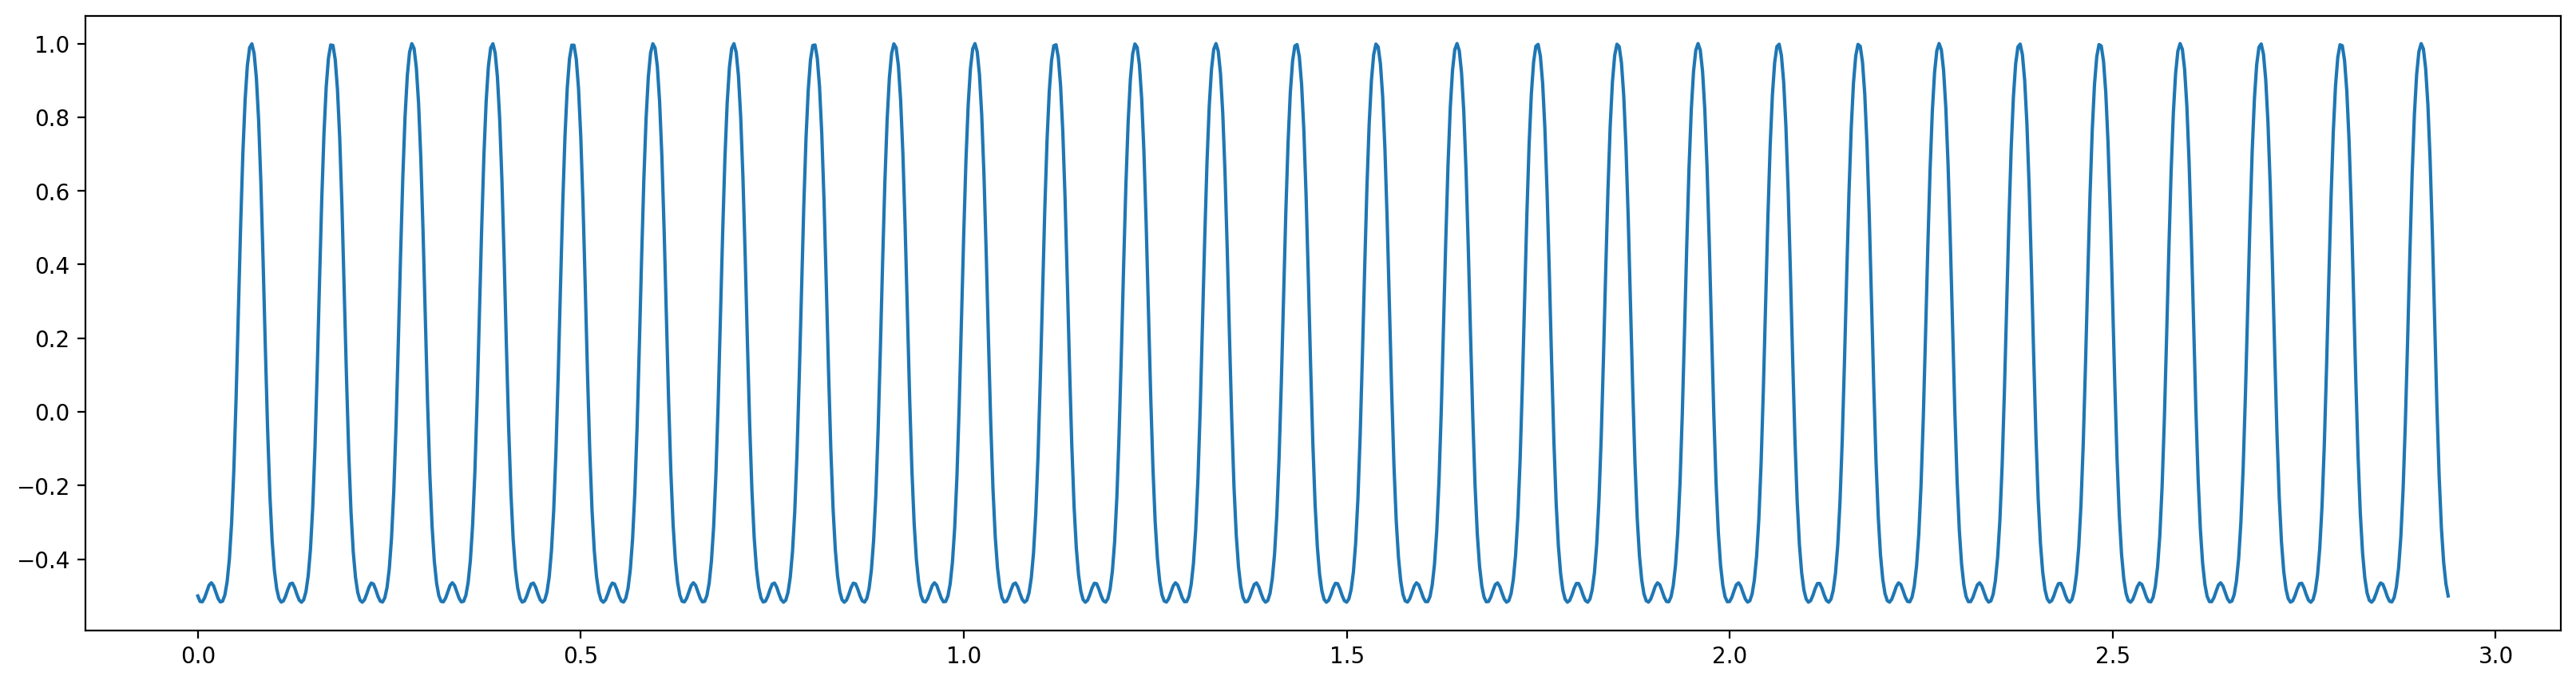

In [11]:
fmap = fmap6
zlist = np.linspace(fmap['z0'],fmap['z1'], 1000)
fieldlist = [fieldmaps.fieldmap_reconstruction_solrf(fmap, z) for z in zlist]
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(zlist, fieldlist)

In [12]:
fieldlist5 = np.array([fieldmaps.fieldmap_reconstruction_solrf(fmap5, z) for z in zlist])
fieldlist6 = np.array([fieldmaps.fieldmap_reconstruction_solrf(fmap6, z) for z in zlist])

In [13]:
l = c/frf
l

0.10496934803921569

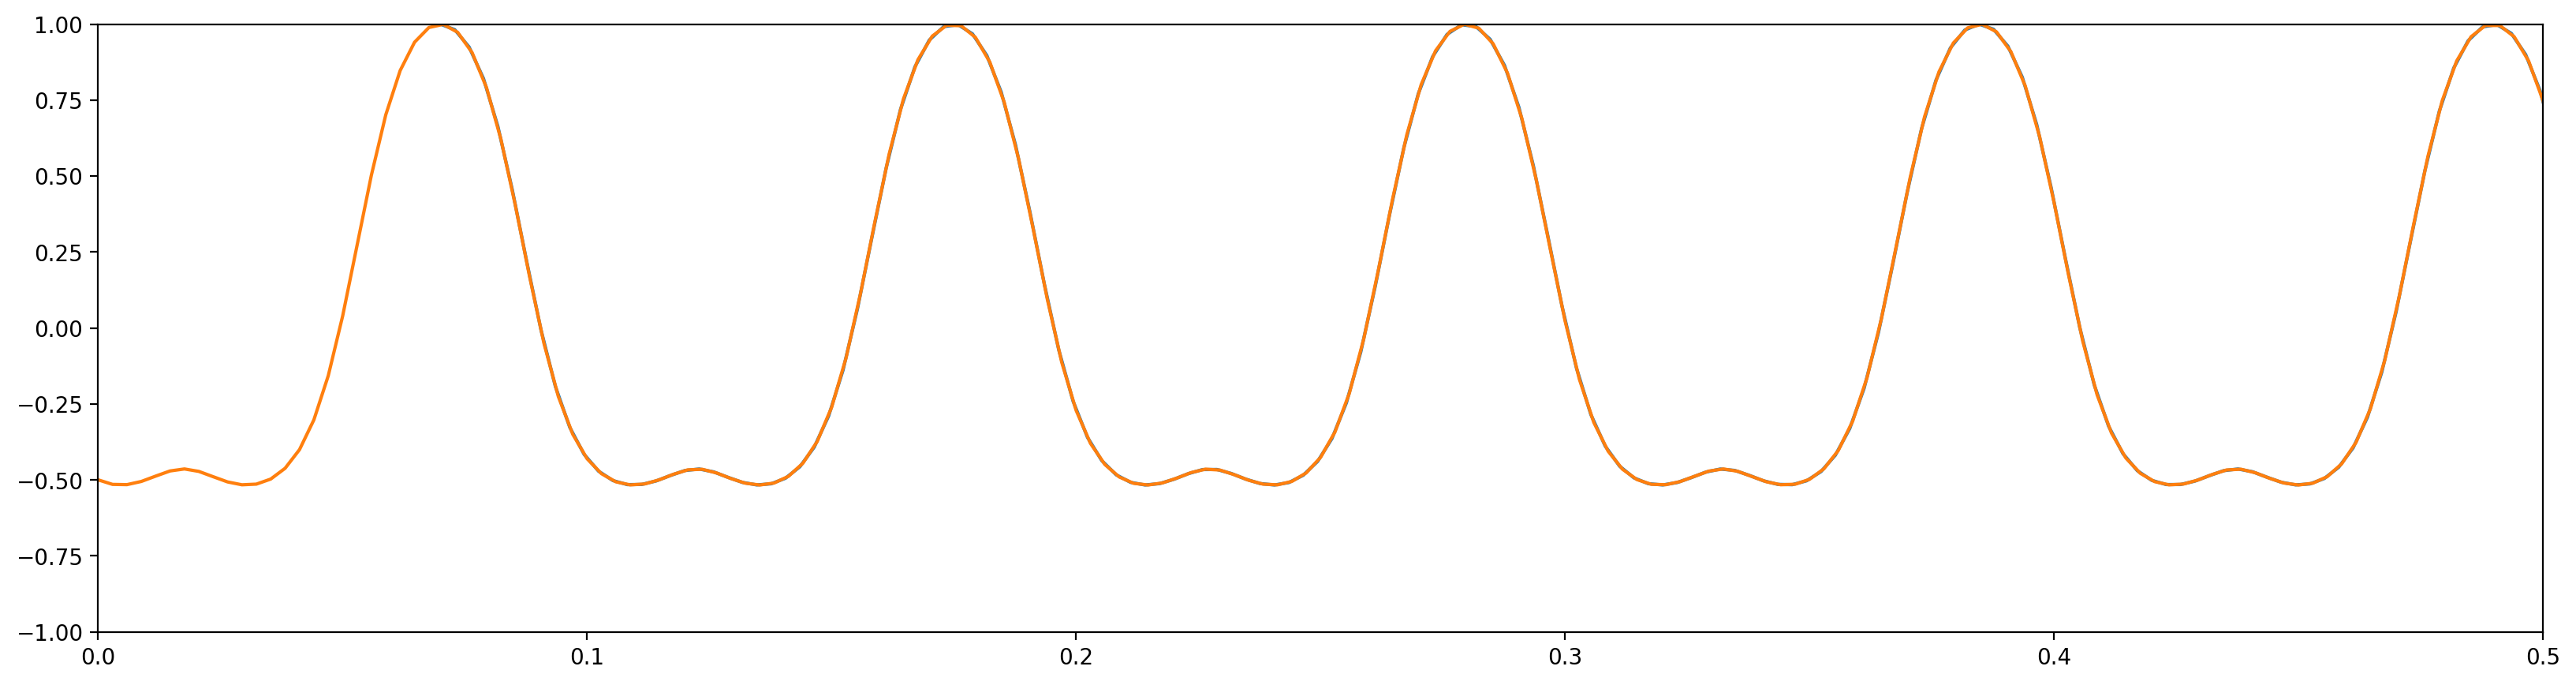

In [14]:
fig, ax = plt.subplots(figsize=(20,5))

wt = 2*np.pi/360*0
plt.ylim(-1,1)
plt.xlim(0,0.5)
ax.plot(zlist+l*2/3, fieldlist5*np.cos(wt))
ax.plot(zlist, fieldlist6*np.cos(wt))

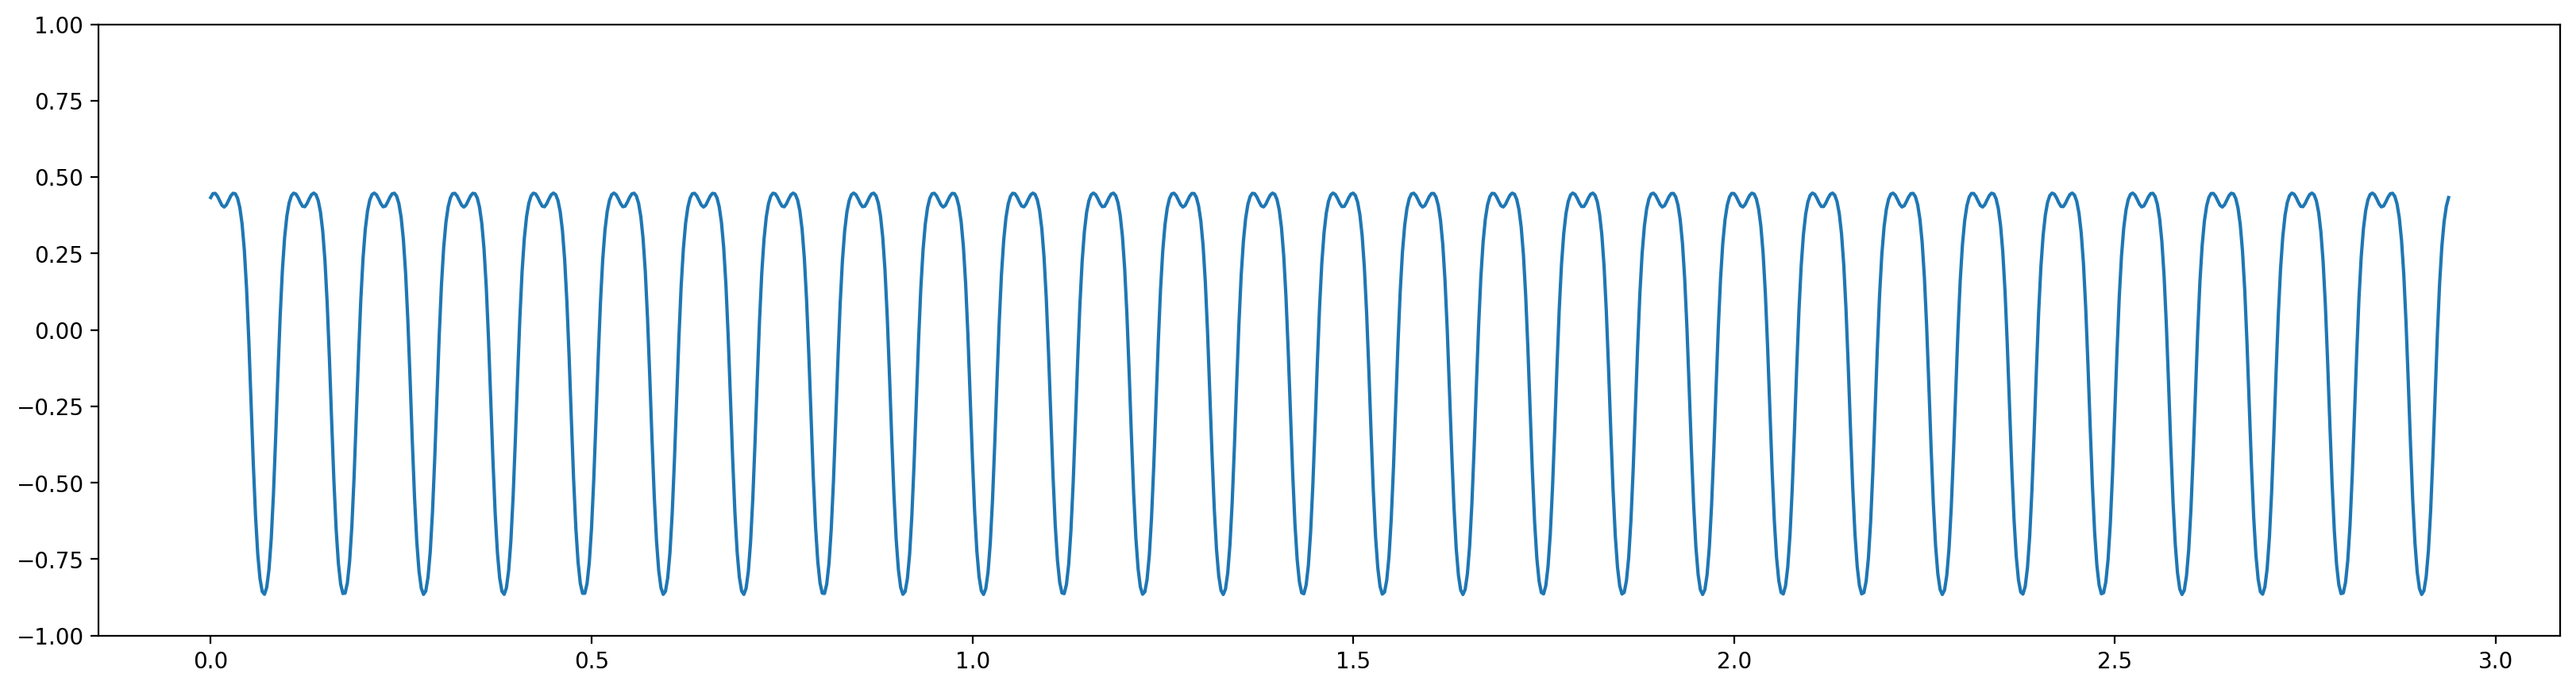

In [15]:
fig, ax = plt.subplots(figsize=(20,5))

wt = 2*np.pi/360*90
plt.ylim(-1,1)
ax.plot(zlist, fieldlist5*np.cos(wt)+fieldlist6*np.cos(wt+2*np.pi*60/360))

In [16]:
0.0586460 +  0.3371281 + 1.1518479 + 1.1515630 +  0.3351400 + 0.0609190

3.095244

In [17]:
0.0586460 +  0.3371281 + 1.1518479

1.5476219999999998

In [18]:
1.1515630 +  0.3351400 + 0.0609190

1.5476219999999998

# ControlGroups

In [19]:
from impact import ControlGroup

In [20]:
# Add a ControlGroup that can change the relative phase

I2 = I.copy()

CAV = ControlGroup(ele_names=['solrf_entrance', 'solrf_body_1', 'solrf_body_2', 'solrf_exit'],
                   var_name = 'dtheta0_deg',
                   attributes = 'theta0_deg'
                  )
CAV.link(I2.ele)
[ele['theta0_deg'] for ele in CAV.eles]

[119.0, 149.0, 209.0, 119.0]

In [21]:
CAV['dtheta0_deg'] = 0
[ele['theta0_deg'] for ele in CAV.eles]

[119.0, 149.0, 209.0, 119.0]

In [22]:
CAV_scale = ControlGroup(ele_names=['solrf_entrance', 'solrf_body_1', 'solrf_body_2', 'solrf_exit'],
                   var_name = 'rf_field_scale',
                  factors = [0.86571945106805, 1, 1, 0.86571945106805],  # sin(k*d) with d = 3.5e-2 m 
                  absolute=True
                  )
CAV_scale.link(I2.ele)

In [23]:
CAV_scale['rf_field_scale'] = 29e6
[ele['rf_field_scale'] for ele in CAV_scale.eles]

[25105864.08097345, 29000000.0, 29000000.0, 25105864.08097345]

# Autophase and scale

In [24]:
#  Changes in phases
I.add_group('L0A', ele_names=['solrf_entrance', 'solrf_body_1', 'solrf_body_2', 'solrf_exit'], var_name='theta0_deg', attributes='theta0_deg')


# Overall scaling, respecting the special factors. 
I.add_group('L0A_scale', ele_names=['solrf_entrance', 'solrf_body_1', 'solrf_body_2', 'solrf_exit'],
                   var_name = 'rf_field_scale',
                  factors = [0.86571945106805, 1, 1, 0.86571945106805],  # sin(k*d) with d = 3.5e-2 m 
                  absolute=True)


ControlGroup(**{"ele_names": ["solrf_entrance", "solrf_body_1", "solrf_body_2", "solrf_exit"], "var_name": "rf_field_scale", "attributes": ["rf_field_scale", "rf_field_scale", "rf_field_scale", "rf_field_scale"], "factors": [0.86571945106805, 1.0, 1.0, 0.86571945106805], "reference_values": [25500000.0, 29430178.7820912, 29430178.7820912, 25500000.0], "absolute": true, "value": 0.0, "name": "L0A_scale"})

In [25]:
from impact.autophase import autophase_and_scale

from pmd_beamphysics import single_particle

# Start particles at 1.4 m, just in front of the cavity
P0 = single_particle(pz=6e6, z=1.4)

In [26]:
autophase_and_scale(I, phase_ele_name='L0A', scale_ele_name='L0A_scale', target=64e6, scale_range=(10e6, 100e6), initial_particles=P0, verbose=True)

Copied initial Impact object. 
Phasing L0A by changing theta0_deg
Scaling L0A_scale by changing rf_field_scale
Bounds: 1.42, 4.462852 m
Tracking initial particles to s = 1.42
Initial particle:  1.42001364304 6021791.459371396
Disabling solrf_1
Disabling solrf_2
Default brent2 algorithm


Phase: 180, Scale: 10000000.0, 24.856464772583482 MeV
Phase: 180, Scale: 10000000.0, 24.856464772583482 MeV


Phase: 42.49224000000004, Scale: 10000000.0, 8.578906397705104 MeV
Phase: 42.49223094384001, Scale: 10000000.0, 8.57890756562477 MeV


Phase: 42.49223999999998, Scale: 10000000.0, 8.578906397705104 MeV
Phase: 222.4922385207506, Scale: 10000000.0, 16.496521287751712 MeV


Phase: 127.47671094383999, Scale: 10000000.0, 21.05105889847044 MeV
Phase: 166.52483783762918, Scale: 10000000.0, 25.312859819887922 MeV


Phase: 167.04288955059457, Scale: 10000000.0, 25.315101189536623 MeV
Phase: 167.517704554632, Scale: 10000000.0, 25.31578171810014 MeV


Phase: 167.68522225919662, Scale: 10000000.0, 25.315707803718432 MeV
Phase: 167.35018685006736, Scale: 10000000.0, 25.315691786975584 MeV
Step 1 phasing found: 167.517704554632


Phase: 167.517704554632, Scale: 10000000.0, 25.31578171810014 MeV
Phase: 167.517704554632, Scale: 100000000.0, 198.2193693243856 MeV


Phase: 167.517704554632, Scale: 30135959.545841277, 64.08457393061273 MeV
Phase: 167.517704554632, Scale: 30092033.04856698, 64.0001401656686 MeV


Phase: 167.517704554632, Scale: 30076987.032042693, 63.97121923669888 MeV
Step 2  scale found: 30092033.04856698
Phase: 166.517704554632, Scale: 30092033.04856698, 63.930448123915845 MeV


Phase: 168.517704554632, Scale: 30092033.04856698, 64.05236338810258 MeV
Phase: 171.75377255463198, Scale: 30092033.04856698, 64.10102785908452 MeV


Phase: 170.99311718390493, Scale: 30092033.04856698, 64.10616594870606 MeV
Phase: 170.04759372355207, Scale: 30092033.04856698, 64.09833350578708 MeV


Phase: 170.63195936984778, Scale: 30092033.04856698, 64.10503293842714 MeV
Phase: 170.99064296460674, Scale: 30092033.04856698, 64.10616600798076 MeV


Phase: 170.99047197395376, Scale: 30092033.04856698, 64.10616600798076 MeV
Phase: 170.9903009834718, Scale: 30092033.04856698, 64.10616600798076 MeV


Phase: 170.8534266706823, Scale: 30092033.04856698, 64.1060003428681 MeV
Phase: 170.93801964971286, Scale: 30092033.04856698, 64.10614171148696 MeV


Phase: 170.97033129154124, Scale: 30092033.04856698, 64.10616241521876 MeV
Phase: 170.98267324012386, Scale: 30092033.04856698, 64.1061654653107 MeV


Phase: 170.98738744485615, Scale: 30092033.04856698, 64.10616592162367 MeV
Phase: 170.98918811078093, Scale: 30092033.04856698, 64.1061659926511 MeV


Phase: 170.98987590394157, Scale: 30092033.04856698, 64.10616600440385 MeV
Phase: 170.99012999316082, Scale: 30092033.04856698, 64.10616600695879 MeV
Step 3 phase found:  170.9903009834718


Phase: 170.9903009834718, Scale: 10000000.0, 25.28060814017475 MeV


Phase: 170.9903009834718, Scale: 100000000.0, 198.94886639590493 MeV
Phase: 170.9903009834718, Scale: 30065527.819441315, 64.05500111759288 MeV


Phase: 170.9903009834718, Scale: 30037065.05392999, 64.00005737067866 MeV
Phase: 170.9903009834718, Scale: 30037035.33397374, 63.999999999932065 MeV
Step 4 scale found:  30037035.33397374
Set Phase: 170.9903009834718, Scale: 30037035.33397374


(np.float64(170.9903009834718), 30037035.33397374)

In [27]:
PF = I.track(P0, 4.5)
PF['mean_energy']

np.float64(63999921.25861558)

# Track distgen particles

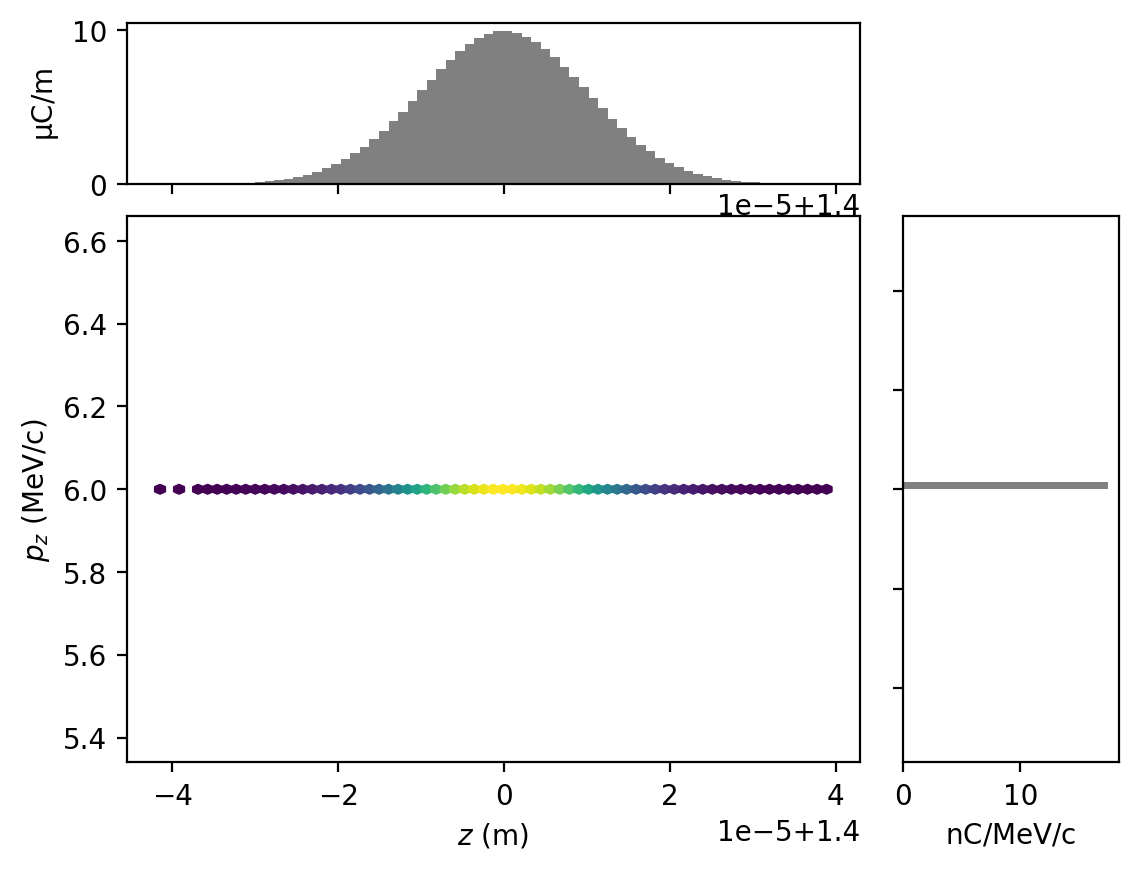

In [28]:
from distgen import Generator

YAML="""
n_particle: 20000
random_type: hammersley
species: electron
start:
  tstart:
    units: sec
    value: 0
  type: time
total_charge:
  units: pC
  value: 250.0
r_dist:
  sigma_xy:
    units: mm
    value: 0.01
  type: radial_gaussian
z_dist:
  avg_z:
    units: m
    value: 1.4
  sigma_z:
    units: mm
    value: 0.01
  type: gaussian
  

transforms:
  setPz:
    type: set_avg pz
    avg_pz: 
      value: 6
      units: MeV/c
  
"""
G = Generator(YAML)
G.run()
DP = G.particles
DP.plot('z', 'pz')


In [29]:
DP['min_z']

np.float64(1.3999585342792105)

In [30]:
I.header['Bcurr'] = 0  # SC off
I.header['Dt'] = 1e-11
PF = I.track(DP, 5)

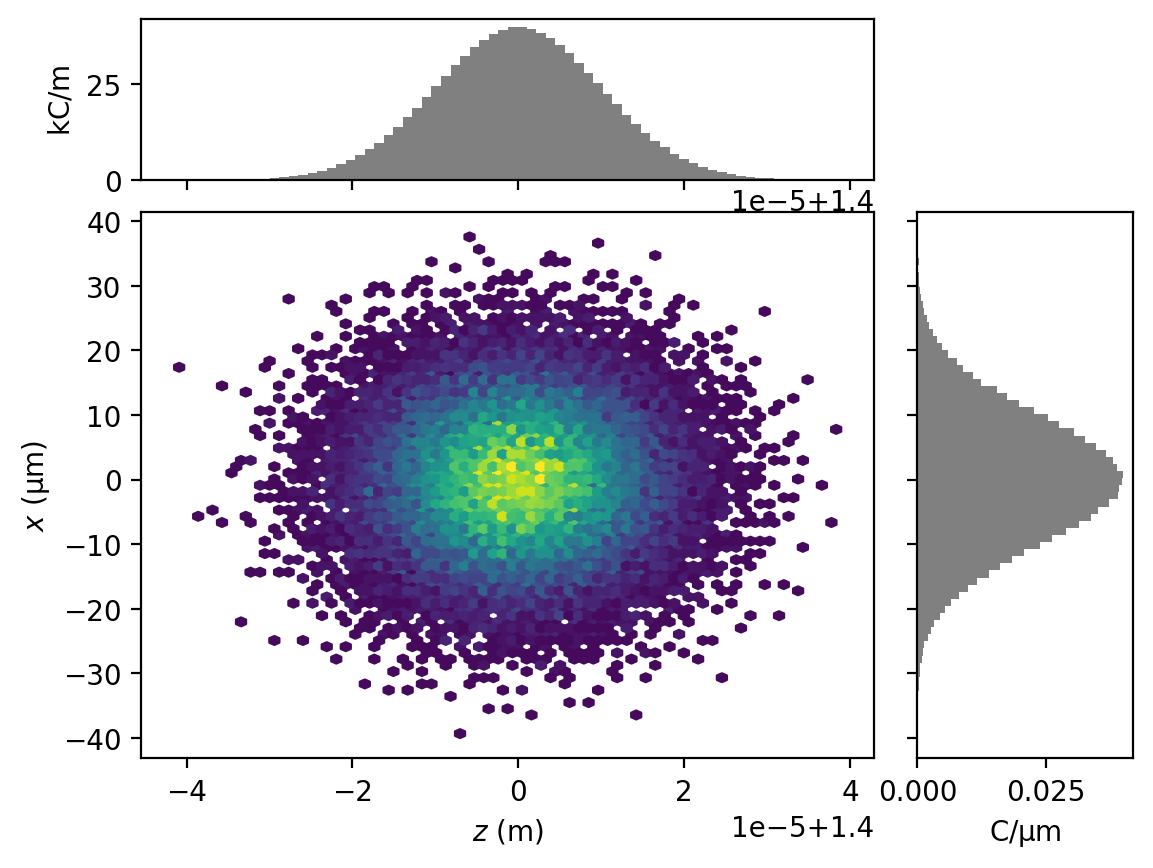

In [31]:
PI = I.particles['initial_particles']
PI.plot('z', 'x')

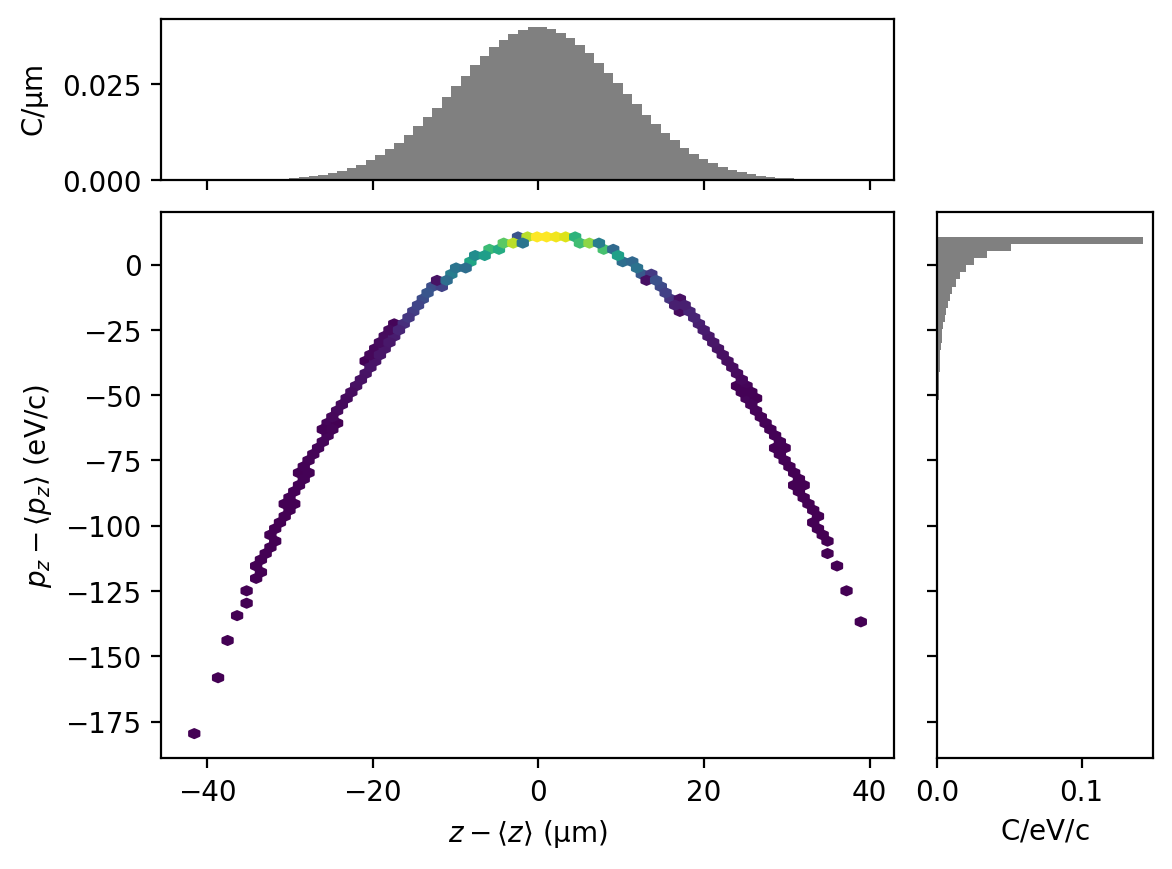

In [32]:
PF.plot('delta_z', 'delta_pz')

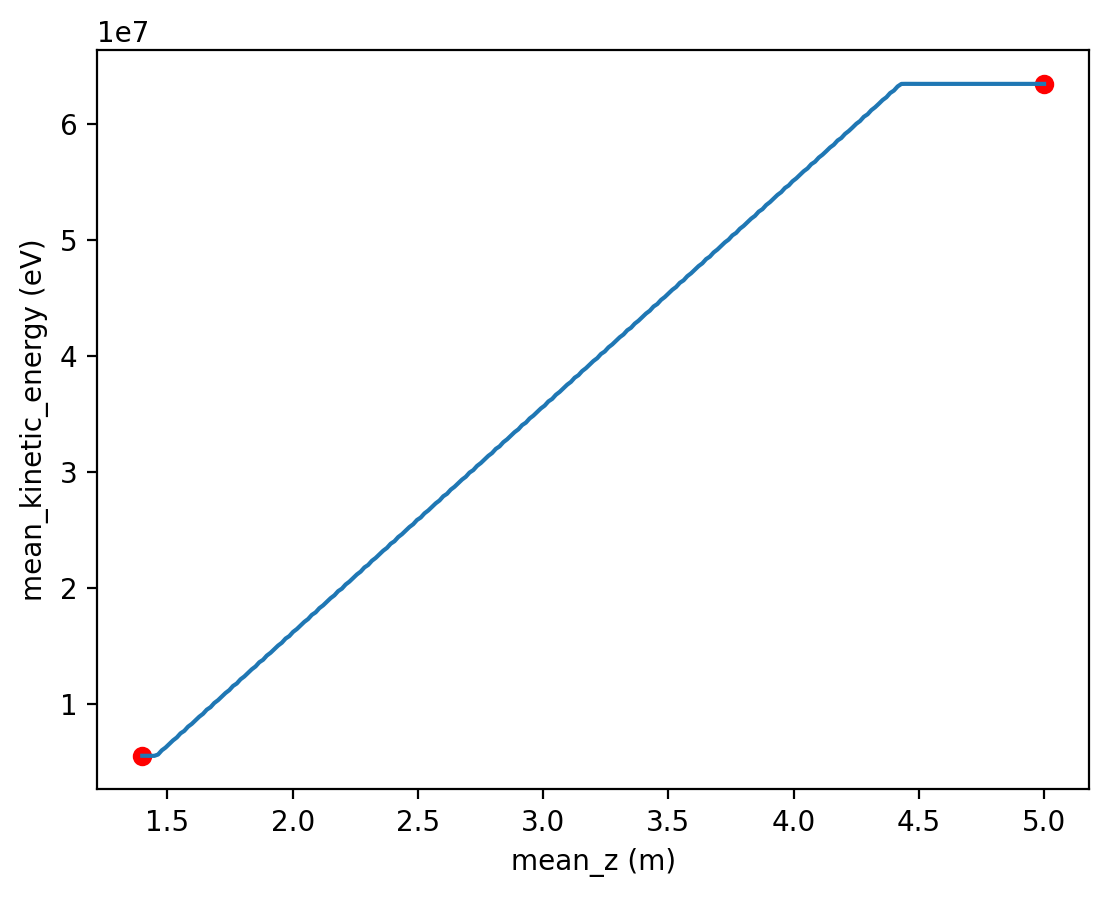

In [33]:
# Compare these. 
key1 = 'mean_z'
key2 = 'mean_kinetic_energy'
units1 = str(I.units(key1))
units2 = str(I.units(key2))
plt.xlabel(key1+f' ({units1})')
plt.ylabel(key2+f' ({units2})')
plt.plot(I.stat(key1), I.stat(key2))
plt.scatter(
    [I.particles[name][key1] for name in I.particles], 
    [I.particles[name][key2] for name in I.particles], color='red')